<h2 style="color:pink;">TP : Température - Système flou (scikit-fuzzy)</h2>


<h3 style="color:#FCC6BB;">Ketatni Maryam IID3</h3>


 <h4 style="color:#F5275B;">Objectif du travail</h4>


Ce TP a pour objectif de **concevoir et modéliser un système de contrôle flou** permettant d’ajuster automatiquement la **vitesse** en fonction de la **température**.

- **Variable d’entrée (Input)** : Température  
- **Variable de sortie (Output)** : Vitesse  

L’objectif est de faire varier la vitesse selon la température de manière automatique :

- Si la température est **froide**, la vitesse doit être **faible**.  
- Si la température est **agréable**, la vitesse doit être **moyenne**.  
- Si la température est **chaude**, la vitesse doit être **élevée**.  

---



<h4 style="color:#F5275B;">Étapes de réalisation  </h4>


1. **Définir la variable linguistique** `Température` et ses trois ensembles flous :  
   - *Froid*  
   - *Agréable*  
   - *Chaud*

2. **Tracer les fonctions d’appartenance** correspondantes sur l’intervalle `[0°C, 50°C]`.

3. **Calculer les degrés d’appartenance (μ)** pour des températures données, par exemple `18°C` et `28°C`.

4. **Concevoir un système flou complet** en définissant la variable de sortie `Vitesse` et les **règles floues** reliant la température à la vitesse.

5. **Simuler la sortie** (vitesse) pour une température donnée, par exemple `17°C`.

---

✅ Ce travail permettra de comprendre le fonctionnement d’un **système de logique floue** et son utilisation dans le contrôle automatique.


<h3 style="color:#1327AB  ;">Étape 1 : Installer les bibliothèques</h3>


In [ ]:
!pip install scikit-fuzzy
!pip install networkx


<h3 style="color:#1327AB  ;">Étape 2 : Importer les bibliothèques</h3>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl


 <h3 style="color:#1327AB  ;">Étape 3 : Définir des univers plus fins</h3>


In [2]:
# Résolution plus fine pour x pas de 1
x_temp = np.arange(0, 51, 1)  
x_vitesse = np.arange(0, 101, 1)


 <h3 style="color:#1327AB  ;">Étape 4 : Définir les ensembles flous</h3>


In [3]:
# Température 
froid = fuzz.trimf(x_temp, [10, 10, 20]) 
agreable = fuzz.trimf(x_temp, [15, 25, 30]) 
chaud = fuzz.trimf(x_temp, [27, 50, 50]) 

# Vitesse 
faible  = fuzz.trimf(x_vitesse, [0, 10, 40]) 
moyenne = fuzz.trimf(x_vitesse, [30, 50, 70]) 
haute   = fuzz.trimf(x_vitesse, [60, 100, 100]) 

<h3 style="color:#1327AB  ;">Étape 5 : Visualiser les ensembles flous </h3>


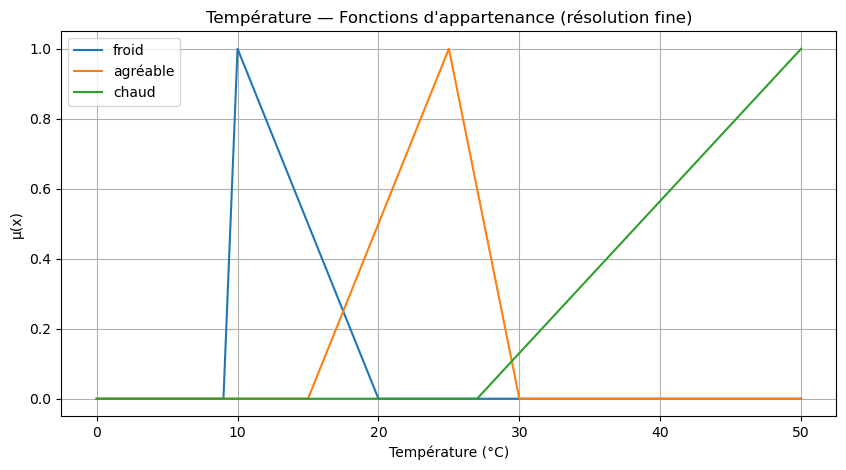

In [4]:
plt.figure(figsize=(10,5))
plt.plot(x_temp, froid, label='froid')
plt.plot(x_temp, agreable, label='agréable')
plt.plot(x_temp, chaud, label='chaud')
plt.title("Température — Fonctions d'appartenance (résolution fine)")
plt.xlabel("Température (°C)")
plt.ylabel("μ(x)")
plt.grid(True)
plt.legend()
plt.show()


<h3 style="color:#1327AB  ;">Étape 6 : Calcul manuel des degrés d’appartenance  </h3>


In [5]:
# Fonction pour calculer μ(x) pour chaque ensemble
def calc_mu(temp):
    mu_f = fuzz.interp_membership(x_temp, froid, temp)
    mu_a = fuzz.interp_membership(x_temp, agreable, temp)
    mu_c = fuzz.interp_membership(x_temp, chaud, temp)
    return mu_f, mu_a, mu_c

# Exemple pour 18°C et 28°C
for t in [18, 28]:
    mu_f, mu_a, mu_c = calc_mu(t)
    print(f"{t}°C → Froid: {mu_f:.3f}, Agréable: {mu_a:.3f}, Chaud: {mu_c:.3f}")


18°C → Froid: 0.200, Agréable: 0.300, Chaud: 0.000
28°C → Froid: 0.000, Agréable: 0.400, Chaud: 0.043


 <h3 style="color:#1327AB  ;"> Étape 7 : Construire le système flou </h3>


In [6]:
# Variables floues
temperature = ctrl.Antecedent(x_temp, 'temperature')
temperature['froid'] = froid
temperature['agreable'] = agreable
temperature['chaud'] = chaud

vitesse = ctrl.Consequent(x_vitesse, 'vitesse')
vitesse['faible']  = faible
vitesse['moyenne'] = moyenne
vitesse['haute']   = haute

# Règles
r1 = ctrl.Rule(temperature['froid'], vitesse['faible'])
r2 = ctrl.Rule(temperature['agreable'], vitesse['moyenne'])
r3 = ctrl.Rule(temperature['chaud'], vitesse['haute'])


<h3 style="color:#1327AB  ;"> Étape 8 : Simuler le système </h3>


In [7]:
v_ctrl = ctrl.ControlSystem([r1, r2, r3])
sim = ctrl.ControlSystemSimulation(v_ctrl)
sim.input['temperature'] = 17
sim.compute()
print(f"Temp = 17°C → vitesse calculée = {sim.output['vitesse']:.2f}")


Temp = 17°C → vitesse calculée = 31.40


c:\Users\HP\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


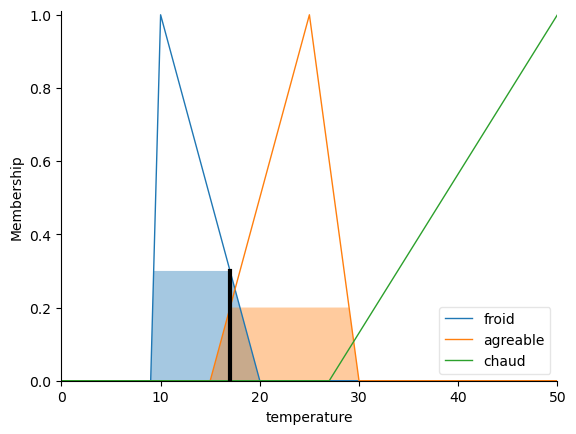

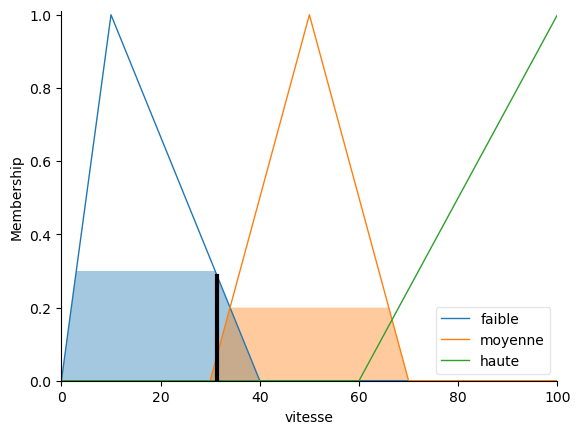

In [8]:
temperature.view(sim=sim); vitesse.view(sim=sim); plt.show()
